In [184]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np

# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.

<div/>

In [7]:
df = pd.read_csv('dataset/heart_tp4.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


<div class="alert alert-block alert-danger"> 
    
2. Display and try to understand each feature in this dataset.

<div/>

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<div class="alert alert-block alert-danger"> 
    
3. Display a summary of the dataset.

<div/>

In [17]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [19]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<div class="alert alert-block alert-danger"> 
    
4. Verify if the dataset contains any missing values.

<div/>

In [24]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<div class="alert alert-block alert-danger"> 
    
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.

<div/>

/tmp/ipykernel_4995/3493625680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'distribution of heart disease samples')

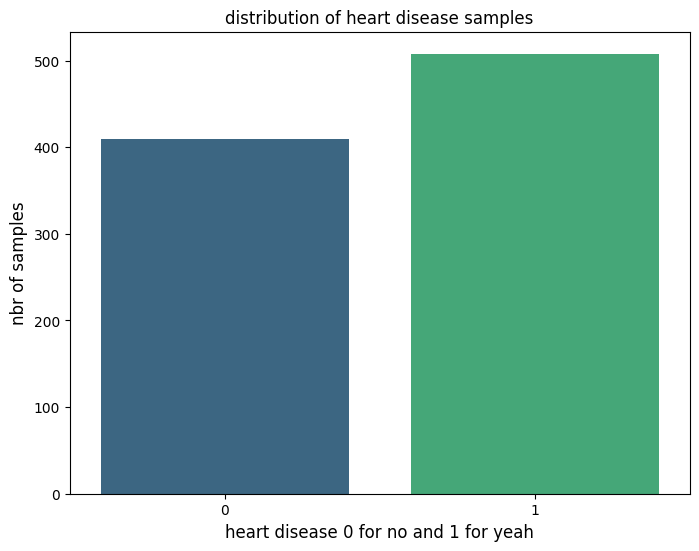

In [27]:
heart_disease_counts = df['HeartDisease'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(
    x = heart_disease_counts.index, y = heart_disease_counts.values, palette='viridis'
)

plt.xlabel( "heart disease 0 for no and 1 for yeah", fontsize = 12 )
plt.ylabel( "nbr of samples", fontsize = 12)
plt.title( "distribution of heart disease samples", fontsize = 12)

<div class="alert alert-block alert-danger"> 
    
6. Apply dummy encoding to all categorical features in the dataset.

<div/>

In [30]:
categorical_columns = df.select_dtypes( include = ['object'] ).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [32]:
df_encoded = pd.get_dummies(
    df, columns = categorical_columns, drop_first = True
)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), in

In [34]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), in

In [38]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


<div class="alert alert-block alert-danger"> 
    
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?

<div/>

In [41]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.055750,-0.218165,-0.011335,0.032042,-0.230566,0.136798,0.215793,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.005133,-0.046153,-0.041348,0.049855,-0.116851,0.090447,0.155101,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.200092,0.150954,-0.006634,0.017365,-0.038470,-0.133106,-0.034166,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.120076,-0.140514,-0.039249,0.026885,-0.093028,0.127110,0.060451,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.189186,0.253735,0.134580,0.100025,0.023801,-0.157879,-0.370425,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.105734,-0.262124,-0.106212,0.032231,-0.116719,0.055958,0.408752,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.305445,-0.401924,-0.212964,-0.054790,-0.091580,0.102527,0.494282,0.554134,-0.622164
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,1.000000,-0.161522,-0.066486,-0.004031,-0.010634,0.063715,0.190664,0.116077,-0.150942
ChestPainType_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,-0.161522,1.000000,-0.256767,-0.110679,0.107941,-0.046111,-0.300365,-0.304667,0.357588
ChestPainType_NAP,-0.011335,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.212964,-0.066486,-0.256767,1.000000,-0.122381,0.005010,-0.042236,-0.166030,-0.072031,0.093583


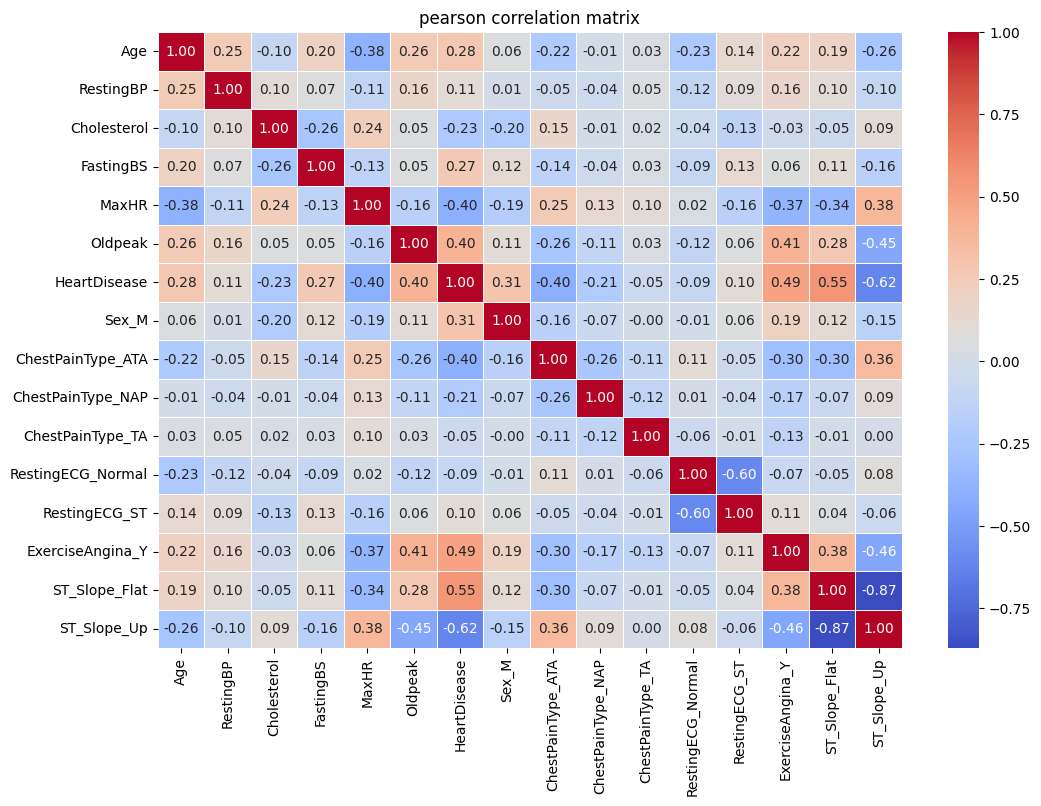

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5
)
plt.title('pearson correlation matrix')
plt.show()

In [45]:
heart_disease_corr = correlation_matrix['HeartDisease']
print("correlations with HeartDisease:")
heart_disease_corr

correlations with HeartDisease:


Age                  0.282039
RestingBP            0.107589
Cholesterol         -0.232741
FastingBS            0.267291
MaxHR               -0.400421
Oldpeak              0.403951
HeartDisease         1.000000
Sex_M                0.305445
ChestPainType_ATA   -0.401924
ChestPainType_NAP   -0.212964
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
RestingECG_ST        0.102527
ExerciseAngina_Y     0.494282
ST_Slope_Flat        0.554134
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

In [47]:
heart_disease_corr[heart_disease_corr.abs() > 0.5]

HeartDisease     1.000000
ST_Slope_Flat    0.554134
ST_Slope_Up     -0.622164
Name: HeartDisease, dtype: float64

<div class="alert alert-block alert-danger"> 
    
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?

<div/>

In [50]:
binary_features = df_encoded
binary_features

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [52]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), in

In [54]:
binary_features = df_encoded.select_dtypes(include=['bool']).columns
binary_features

Index(['Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [56]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [58]:
non_binary_features = [feature for feature in numerical_features if feature not in binary_features]
non_binary_features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [60]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [62]:
scaler = MinMaxScaler()
df_encoded_scaled = df_encoded.copy()  
df_encoded_scaled[non_binary_features] = scaler.fit_transform(df_encoded[non_binary_features])

In [64]:
df_encoded_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,True,True,False,False,True,False,False,False,True
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,False,False,True,False,True,False,False,True,False
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,True,True,False,False,False,True,False,False,True
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,False,False,False,False,True,False,True,True,False
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,True,False,True,False,True,False,False,False,True


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

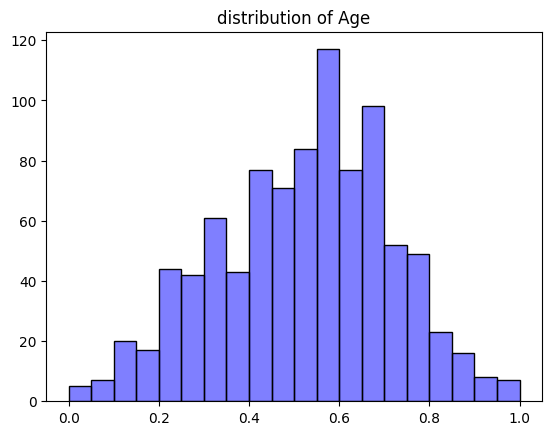

In [66]:
plt.title('distribution of Age')
sns.histplot(df_encoded_scaled['Age'].to_numpy(), kde=True, bins=20, color='blue')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

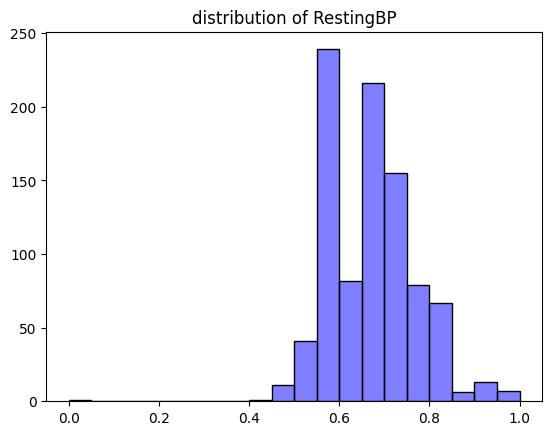

In [68]:
plt.title('distribution of RestingBP')
sns.histplot(df_encoded_scaled['RestingBP'].to_numpy(), kde=True, bins=20, color='blue')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

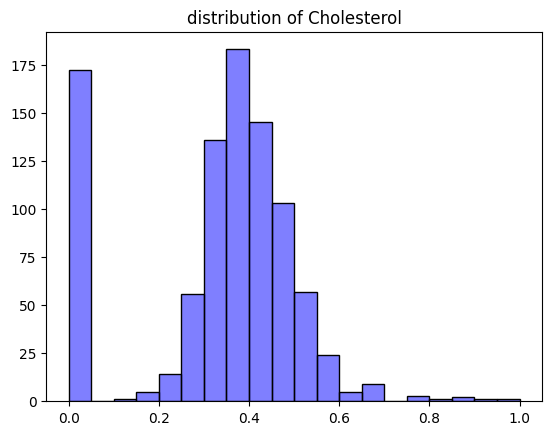

In [70]:
plt.title('distribution of Cholesterol')
sns.histplot(df_encoded_scaled['Cholesterol'].to_numpy(), kde=True, bins=20, color='blue')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

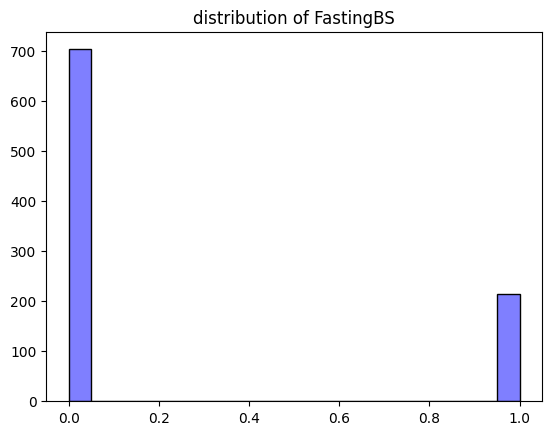

In [72]:
plt.title('distribution of FastingBS')
sns.histplot(df_encoded_scaled['FastingBS'].to_numpy(), kde=True, bins=20, color='blue')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

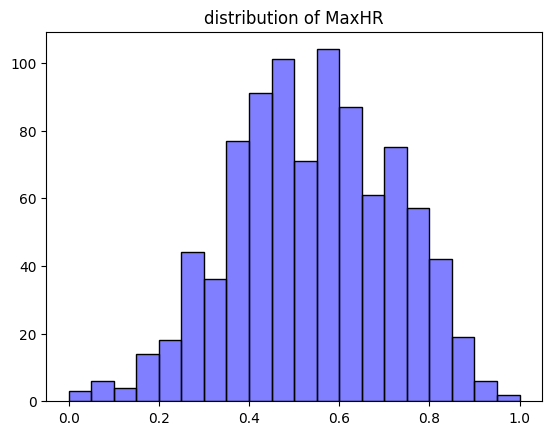

In [74]:
plt.title('distribution of MaxHR')
sns.histplot(df_encoded_scaled['MaxHR'].to_numpy(), kde=True, bins=20, color='blue')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

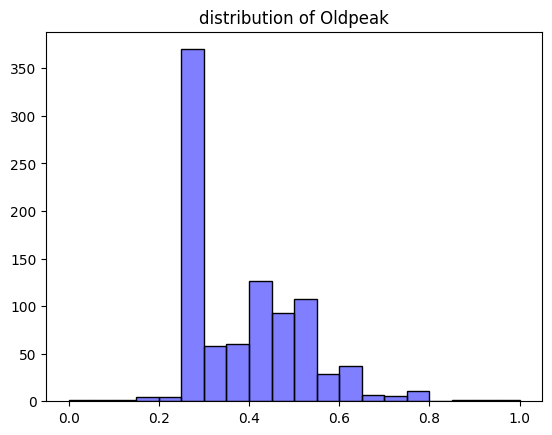

In [76]:
plt.title('distribution of Oldpeak')
sns.histplot(df_encoded_scaled['Oldpeak'].to_numpy(), kde=True, bins=20, color='blue')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

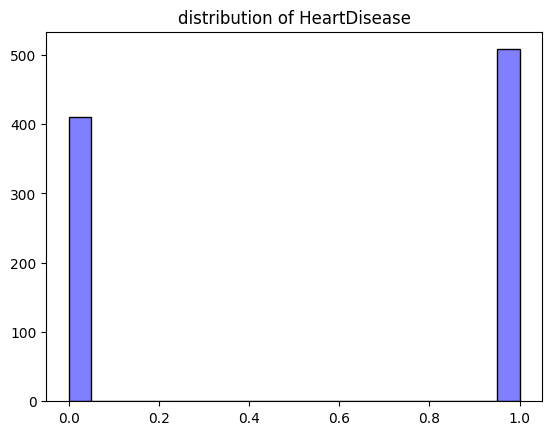

In [78]:
plt.title('distribution of HeartDisease')
sns.histplot(df_encoded_scaled['HeartDisease'].to_numpy(), kde=True, bins=20, color='blue')
plt.show()

<div class="alert alert-block alert-danger"> 
    
9. Split the data into a training and a testing set using a ratio of 0.3.

<div/>

In [81]:
X = df_encoded_scaled.drop('HeartDisease', axis=1)
y = df_encoded_scaled['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
y_test.value_counts()

HeartDisease
1.0    164
0.0    112
Name: count, dtype: int64

In [85]:
X_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
668,0.714286,0.700,0.323383,0.0,0.838028,0.295455,False,True,False,False,True,False,False,False,True
30,0.510204,0.725,0.859038,0.0,0.492958,0.295455,True,False,True,False,True,False,False,True,False
377,0.755102,0.800,0.000000,1.0,0.436620,0.431818,True,False,False,False,False,True,False,True,False
535,0.571429,0.650,0.000000,0.0,0.436620,0.409091,True,False,False,False,False,False,True,True,False
807,0.530612,0.540,0.512438,0.0,0.676056,0.295455,True,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.571429,0.750,0.381426,0.0,0.450704,0.465909,True,False,False,False,False,True,True,True,False
813,0.836735,0.700,0.396352,0.0,0.640845,0.500000,False,False,False,True,True,False,False,False,True
734,0.571429,0.650,0.469320,1.0,0.302817,0.477273,True,False,False,False,False,False,True,False,False
360,0.693878,0.800,0.000000,0.0,0.084507,0.295455,True,False,True,False,True,False,True,True,False


<div class="alert alert-block alert-danger"> 
    
10. Normalize the data using z-score scaling.

<div/>

In [88]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [92]:
# df_scaled.head()

### Data training and performance evaluation

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).

</div>

In [96]:
gaussian_naive_bayes = GaussianNB()
gaussian_naive_bayes.fit(X_train, y_train)
y_pred_gauss = gaussian_naive_bayes.predict(X_test)

print("gaussian naive bayes: ")
print("accuracy: ", accuracy_score(y_test, y_pred_gauss))
print(classification_report(y_test, y_pred_gauss))

gaussian naive bayes: 
accuracy:  0.8768115942028986
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       112
         1.0       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [98]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("knn with k = 3: ")
print("accuracy: ", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

knn with k = 3: 
accuracy:  0.8586956521739131
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       112
         1.0       0.92      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



In [100]:
decision_tree = DecisionTreeClassifier(max_depth=6, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

print("decision tree with max_depth = 6: ")
print("accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))

decision tree with max_depth = 6: 
accuracy: 0.822463768115942
              precision    recall  f1-score   support

         0.0       0.74      0.86      0.80       112
         1.0       0.89      0.80      0.84       164

    accuracy                           0.82       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83      0.82      0.82       276



In [102]:
# accuracy indicates the model correctly predicted x% of the total samples

# classification raport results

# 0.0: absence of heart disease
# 1.0: presence of heart disease

# precision = (TP) / (TP + FP) --> from all predicted samples as the specific class, it measures how many were actually correct

# recall = (TP) / (TP + FN) --> from all samples that truly belongs to the class, it measures how many were correctly identified

# F1-score = (2 * precision * recall) / (precision + recall) --> combines precision and recall in single metric

# support: the number of actual accurrences of each class in test set

# macro average = [class(0.0) + class(1.0)]  2

# weighted average = [ sum(metric * support) ] / [ sum(support) ]

<div class="alert alert-block alert-danger"> 
    
2. Display and save the tree generated by the decision tree algorithm.

</div>

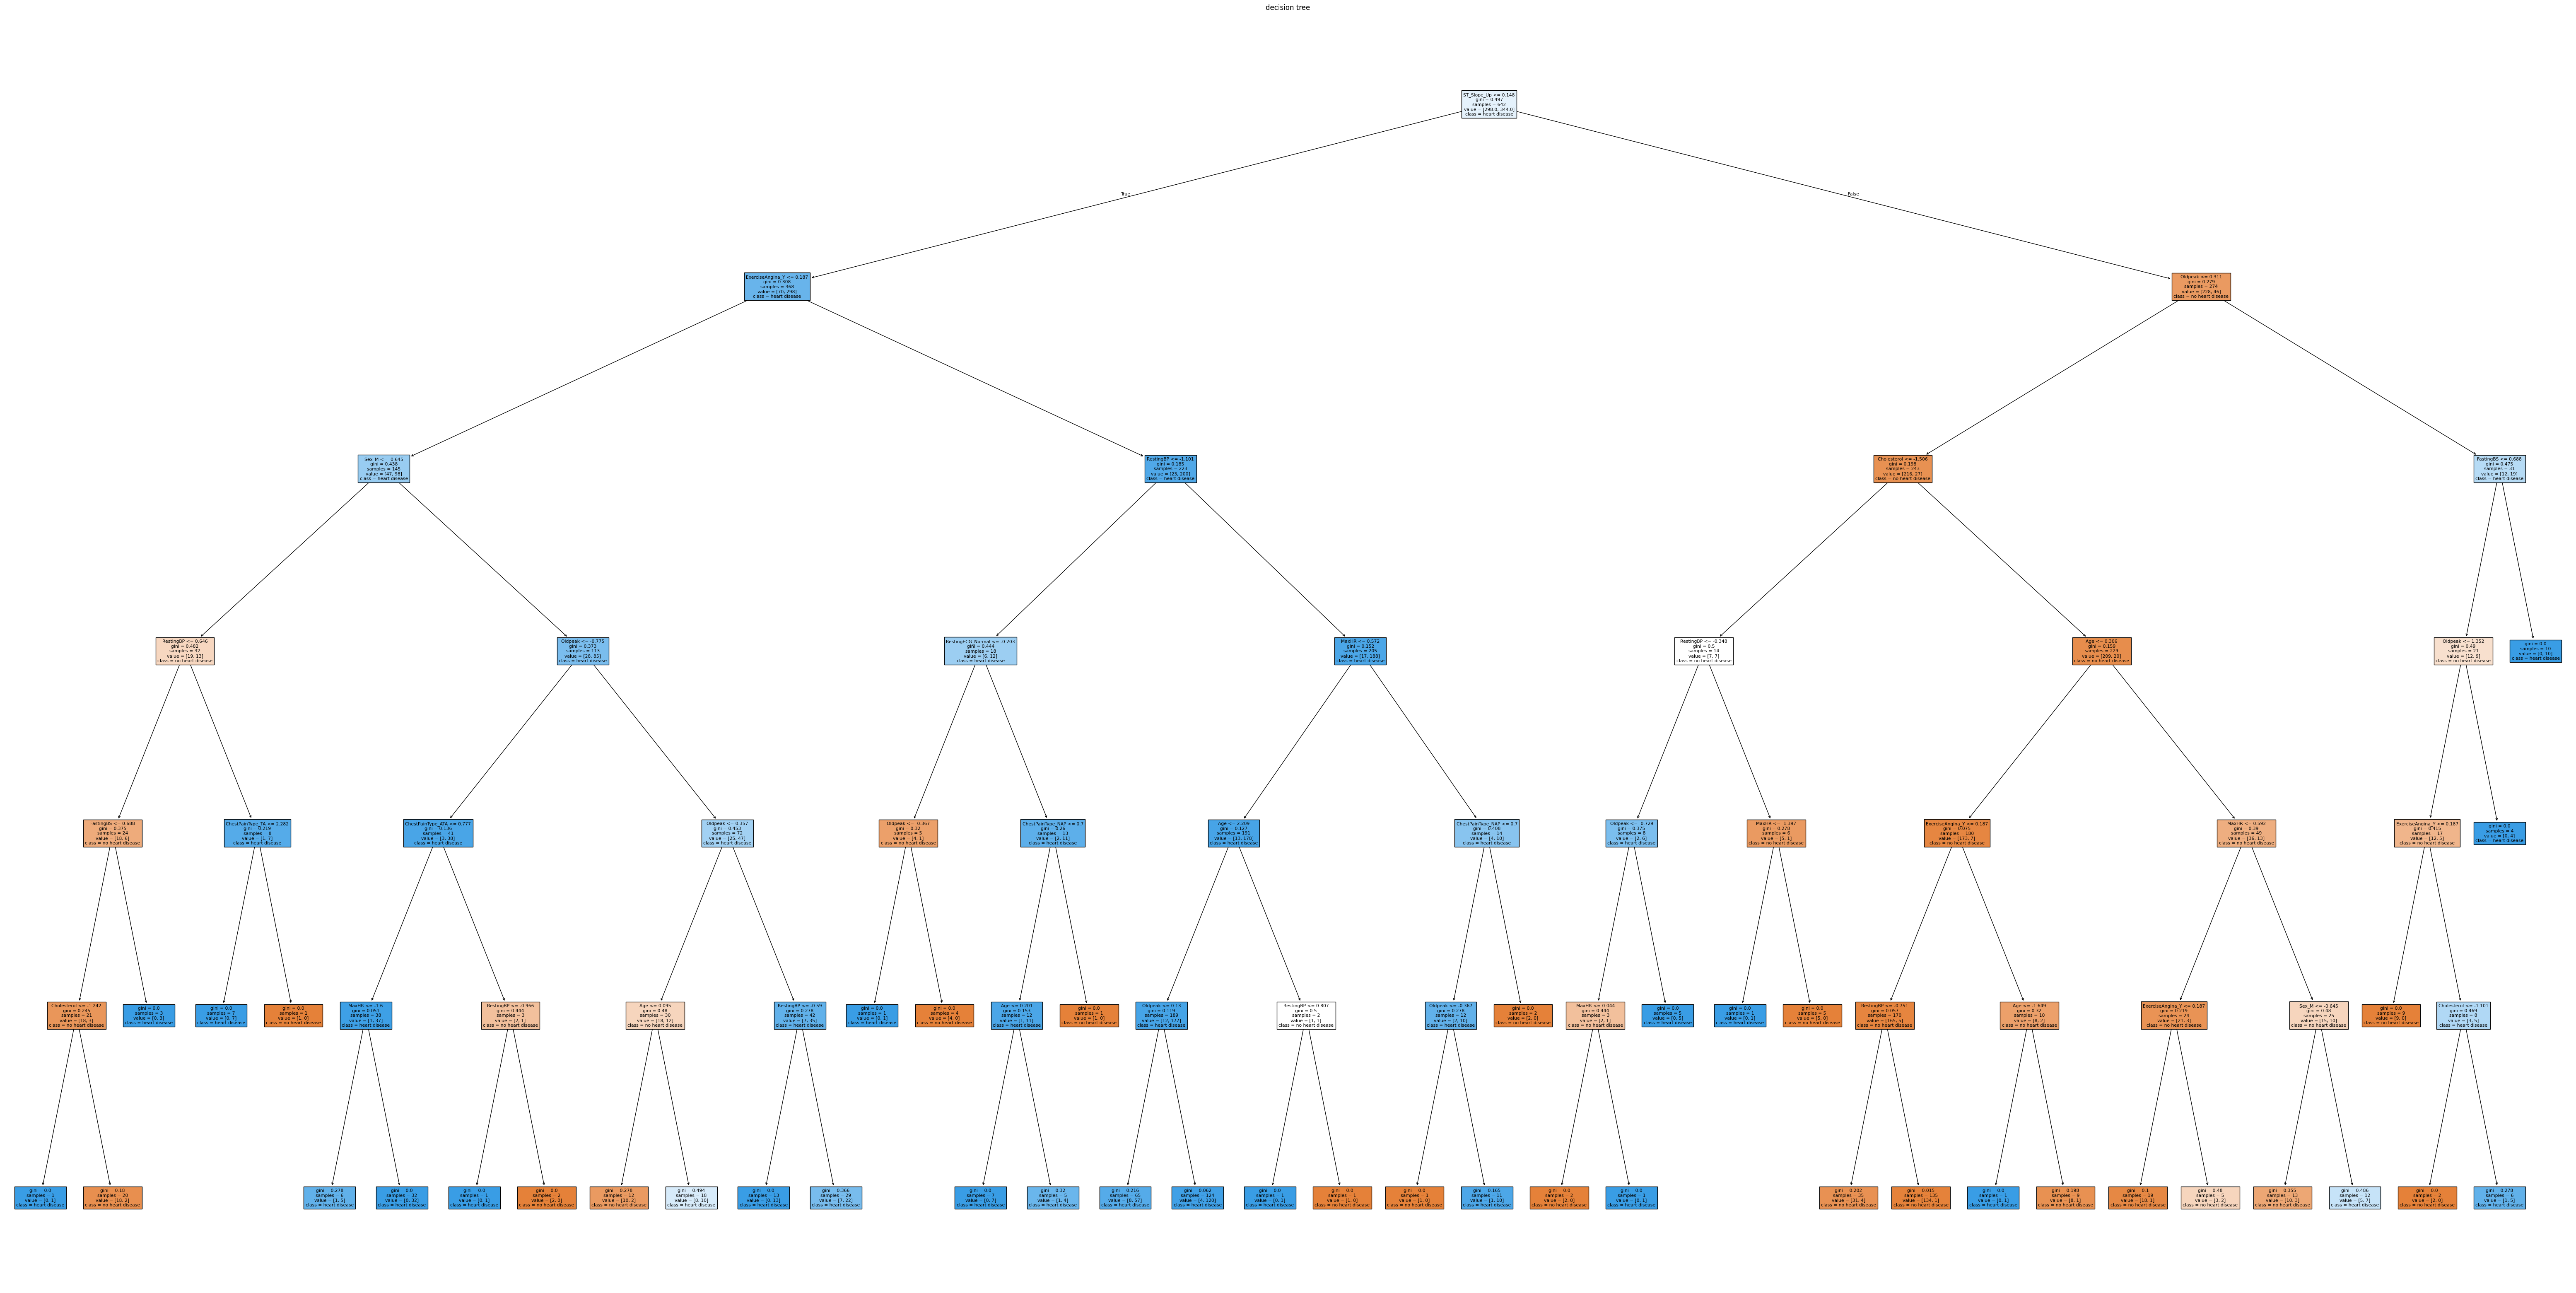

In [105]:
plt.figure(figsize=(80, 40))
plot_tree(
    decision_tree, 
    feature_names=X.columns,
    class_names=["no heart disease", "heart disease"],
    filled=True, 
    rounded=False
) 
plt.title("decision tree")
plt.savefig("decision_tree.png", bbox_inches="tight")
plt.show()

<div class="alert alert-block alert-danger"> 
    
3. Implement the SVM algorithm from scratch and apply it to the dataset.

</div>

In [156]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        predictions = np.sign(linear_output)
        return np.where(predictions == -1, 0, 1)

In [158]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

In [160]:
print("accuracy: ", accuracy_score(y_test, y_pred))
print("classification report: \n", classification_report(y_test, y_pred))

accuracy:  0.8731884057971014
classification report: 
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       112
         1.0       0.92      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



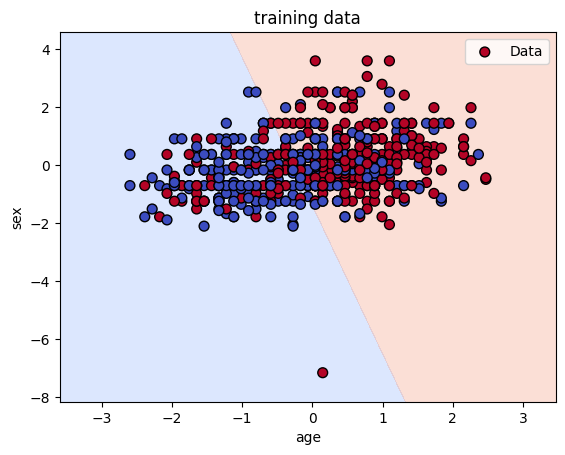

/tmp/ipykernel_4995/2662868305.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


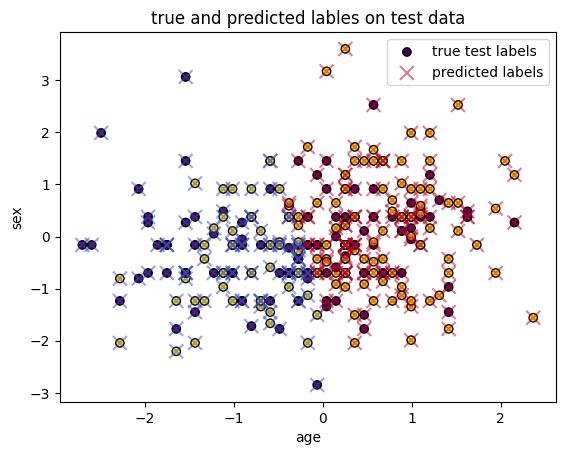

In [188]:
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

svm.fit(X_train_2d, y_train)
y_pred_2d = svm.predict(X_test_2d)

def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], model.w[:2]) - model.b
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=0, cmap="coolwarm", alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=50, edgecolor="k", label="Data")

    plt.title(title)
    plt.xlabel("age")
    plt.ylabel("sex")
    plt.legend()
    plt.show()

plot_decision_boundary(X_train_2d, y_train, svm, title="training data")

def plot_test_predictions(X_test, y_test, y_pred):
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="o", label="true test labels", edgecolors="k")
    plt.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_pred,
        marker="x",
        label="predicted labels",
        cmap="coolwarm",
        s=100,
        alpha=0.5,
        edgecolors="k",
    )
    plt.title("true and predicted lables on test data")
    plt.xlabel("age")
    plt.ylabel("sex")
    plt.legend()
    plt.show()

plot_test_predictions(X_test_2d, y_test, y_pred_2d)


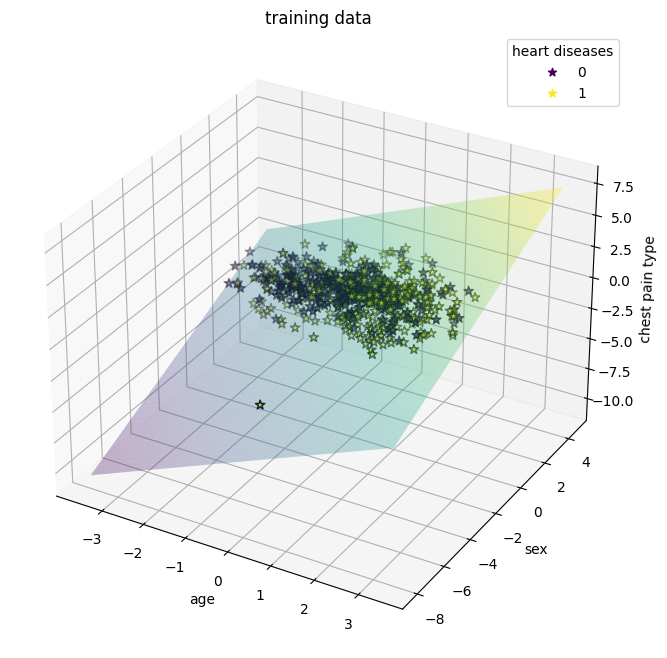

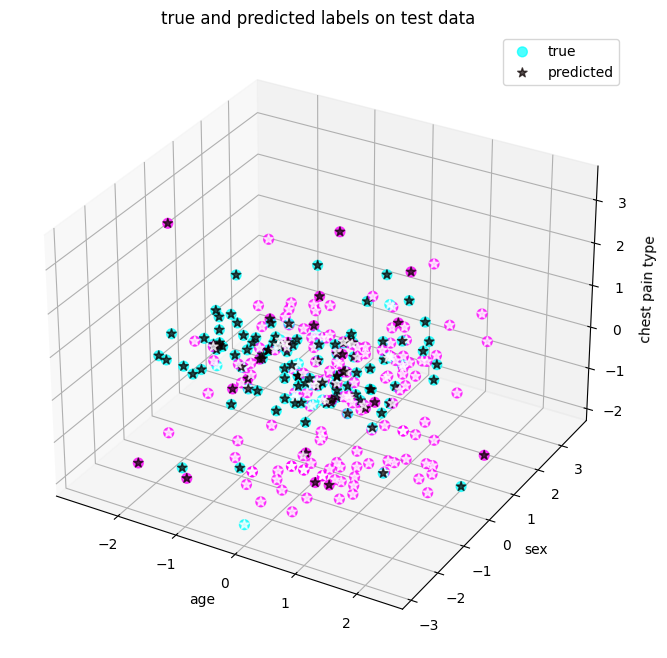

In [206]:
X_train_3d = X_train[:, :3]
X_test_3d = X_test[:, :3]

svm.fit(X_train_3d, y_train)

def plot_decision_boundary_3d(X, y, model, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    zz = -(model.w[0] * xx + model.w[1] * yy + model.b) / model.w[2]

    ax.plot_surface(xx, yy, zz, alpha=0.3, cmap=cm.viridis, edgecolor="none")

    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cm.viridis, marker='*', s=50, edgecolor="k", label="Data")

    ax.set_title(title)
    ax.set_xlabel("age")
    ax.set_ylabel("sex")
    ax.set_zlabel("chest pain type")
    ax.legend(*scatter.legend_elements(), title="heart diseases")
    plt.show()

plot_decision_boundary_3d(X_train_3d, y_train, svm, title="training data")


def plot_3d_true_vs_predicted(X, y_true, y_pred, title="trueand predicted labels"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(
        X[:, 0], X[:, 1], X[:, 2],
        c=y_true,
        cmap="cool",
        label="true",
        marker="o",
        s=50,
        alpha=0.7
    )

    ax.scatter(
        X[:, 0], X[:, 1], X[:, 2],
        c=y_pred,
        cmap="hot",
        label="predicted",
        marker="*",
        s=50,
        alpha=0.7
    )

    ax.set_xlabel("age")
    ax.set_ylabel("sex")
    ax.set_zlabel("chest pain type")
    ax.set_title(title)

    ax.legend()

    plt.show()

plot_3d_true_vs_predicted(X_test, y_test, y_pred, title="true and predicted labels on test data")


<div class="alert alert-block alert-danger"> 
    
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.

</div>

In [115]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

gaussian naive bayes classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       112
         1.0       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



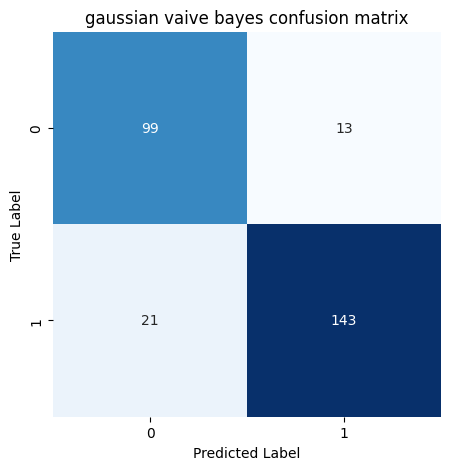

In [117]:
# gaussian naive bayes

print("gaussian naive bayes classification report:")
print(classification_report(y_test, y_pred_gauss))
cm_gauss = confusion_matrix(y_test, y_pred_gauss)
plot_confusion_matrix(cm_gauss, "gaussian vaive bayes confusion matrix")

knn with k = 3 classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       112
         1.0       0.92      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



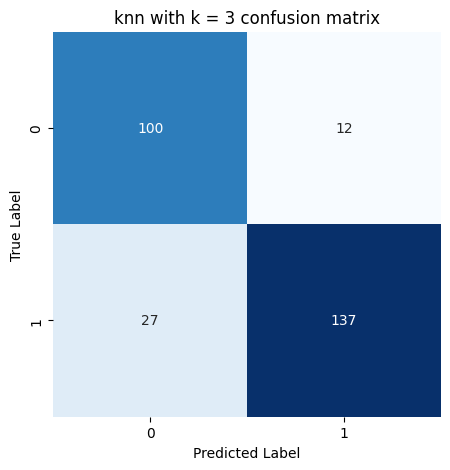

In [119]:
# knn with k = 3

print("knn with k = 3 classification report:")
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, "knn with k = 3 confusion matrix")

decision tree classification report:
              precision    recall  f1-score   support

         0.0       0.74      0.86      0.80       112
         1.0       0.89      0.80      0.84       164

    accuracy                           0.82       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83      0.82      0.82       276



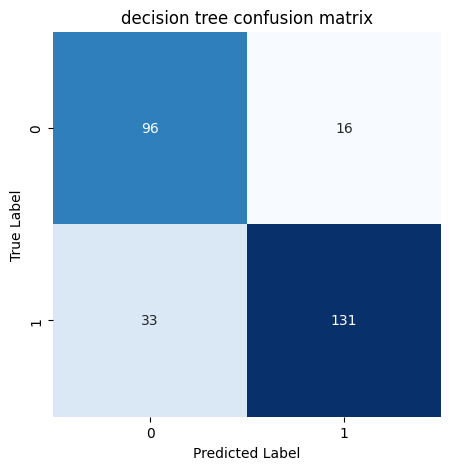

In [121]:
# decision tree 

print("decision tree classification report:")
print(classification_report(y_test, y_pred_decision_tree))
cm_tree = confusion_matrix(y_test, y_pred_decision_tree)
plot_confusion_matrix(cm_tree, "decision tree confusion matrix")

<div class="alert alert-block alert-danger"> 
    
5. Display the ROC curves of the generated models in one plot.

</div>

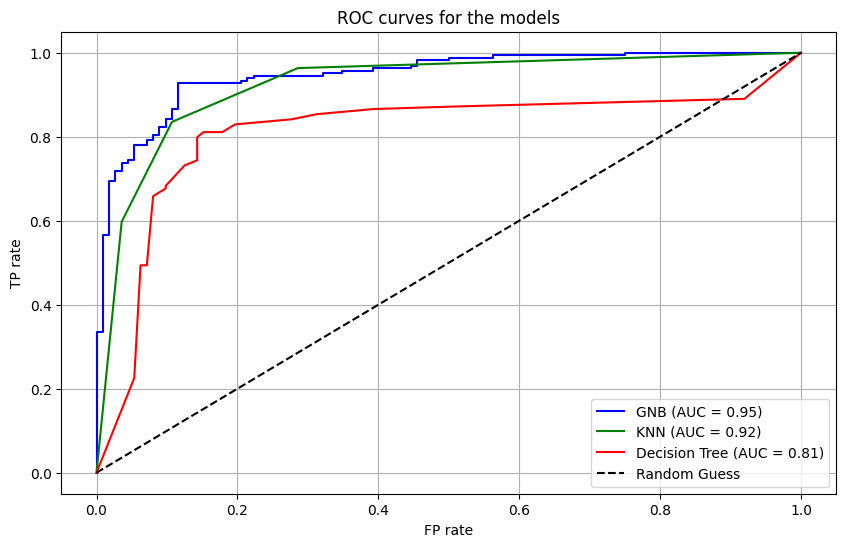

In [124]:
y_pred_proba_gnb = gaussian_naive_bayes.predict_proba(X_test)[:, 1]
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
y_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f'GNB (AUC = {roc_auc_gnb:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})', color='green')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='red')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('ROC curves for the models')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.legend(loc='lower right')
plt.grid()

plt.show()


<div class="alert alert-block alert-danger"> 
    
6. Which evaluation metric do you recommend for this dataset?
   
</div>

In [208]:
# accuracy: cause we have balanced dataset = nbr of the correct prediction / total predictions
# f1-score: cause it's comb between recall and precision --> goal: minimize FP and FN

<div class="alert alert-block alert-danger"> 
    
7. Predict the class of the third sample from the testing set based on the best-performing model.

</div>

In [130]:
third_sample = X_test[2]
third_sample

array([ 1.20450398,  1.45235803, -1.90539005,  1.90228942, -0.60542385,
        0.26618089,  0.54494926, -0.48926704, -0.52085231, -0.20952909,
       -1.22395036,  2.02366946, -0.83034552,  0.97538084, -0.86288193])

In [132]:
predicted_class = gaussian_naive_bayes.predict([third_sample])
print("predicted class: ", predicted_class[0])

predicted class:  1.0


In [134]:
actual_class = y_test.iloc[2] 
print("actual class: ", actual_class)

actual class:  1.0


<div class="alert alert-block alert-danger"> 

8. Perform the cross-validation evaluation method on the best model based on the selected metric.

</div>

In [216]:
# auc
gnb = GaussianNB()
cv_scores = cross_val_score(gnb, X, y, cv=5, scoring='roc_auc') 

print("cross-validation AUC scores: ", cv_scores)
print("mean AUC: ", cv_scores.mean())
print("standard deviation of AUC: ", cv_scores.std())

cross-validation AUC scores:  [0.94691535 0.96771879 0.90889527 0.90074861 0.8631973 ]
mean AUC:  0.9174950637101013
standard deviation of AUC:  0.03658038913453178


In [218]:
# accuracy
gnb = GaussianNB()
cv_scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy') 

print("cross-validation accuracy scores: ", cv_scores)
print("mean accuracy: ", cv_scores.mean())
print("standard deviation of accuracy: ", cv_scores.std())

cross-validation accuracy scores:  [0.86413043 0.88586957 0.83695652 0.84153005 0.75956284]
mean accuracy:  0.8376098835827988
standard deviation of accuracy:  0.04275388146929111


In [220]:
# f1
gnb = GaussianNB()
cv_scores = cross_val_score(gnb, X, y, cv=5, scoring='f1') 

print("cross-validation f1 scores: ", cv_scores)
print("mean f1: ", cv_scores.mean())
print("standard deviation of f1: ", cv_scores.std())

cross-validation f1 scores:  [0.86910995 0.89230769 0.87179487 0.85990338 0.77083333]
mean f1:  0.8527898453444778
standard deviation of f1:  0.04232415210668897
